In [1]:
import numpy as np
import pandas as pd

In [2]:
laptop=pd.read_csv("laptop_data.csv")

In [3]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
laptop.duplicated().sum()

0

In [5]:
laptop.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
laptop=laptop.drop(columns="Unnamed: 0")

In [7]:
laptop["Ram"]=laptop["Ram"].str.replace("GB","").astype("Int8")

In [8]:
laptop["Weight"]=laptop["Weight"].str.replace("kg",'').astype("float")

In [10]:
laptop.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095


In [11]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   Int8   
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int32  
dtypes: Int8(1), float64(2), int32(1), object(7)
memory usage: 99.4+ KB


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

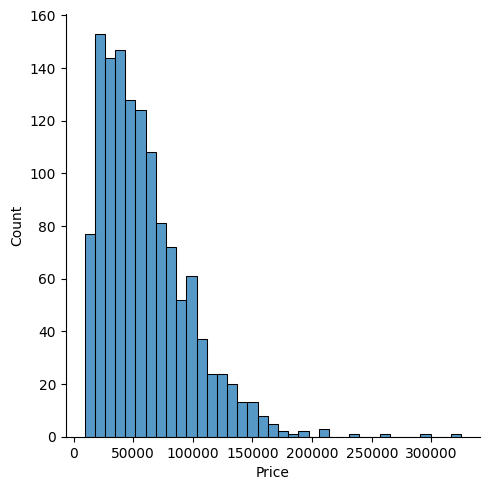

In [13]:
sns.displot(laptop["Price"])

<Axes: xlabel='Company'>

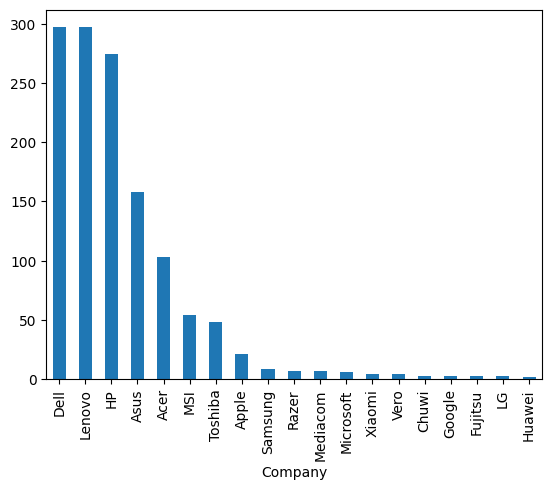

In [21]:
laptop['Company'].value_counts().plot(kind="bar")

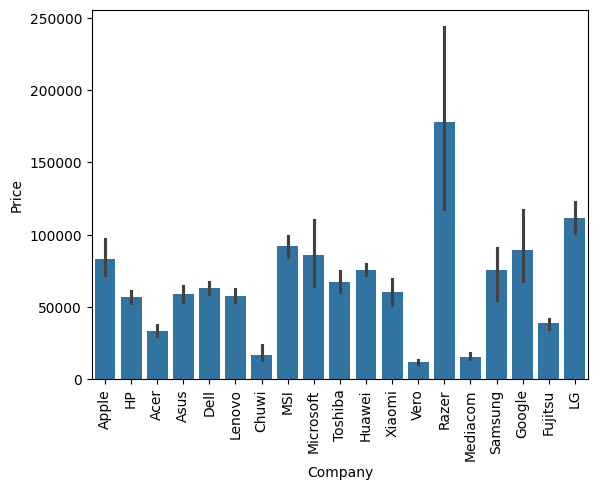

In [25]:
sns.barplot(x=laptop["Company"],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

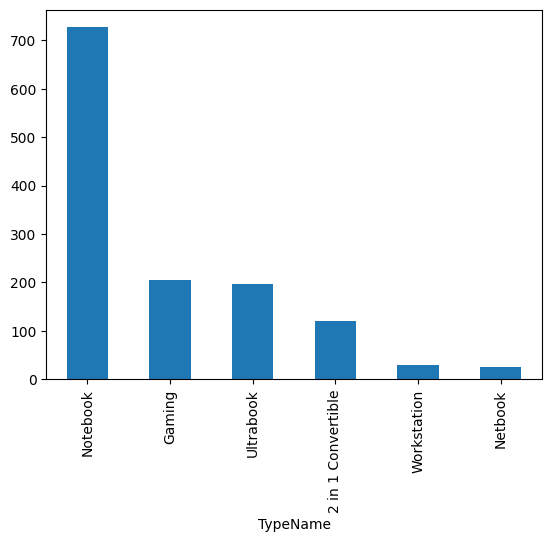

In [27]:
laptop['TypeName'].value_counts().plot(kind="bar")

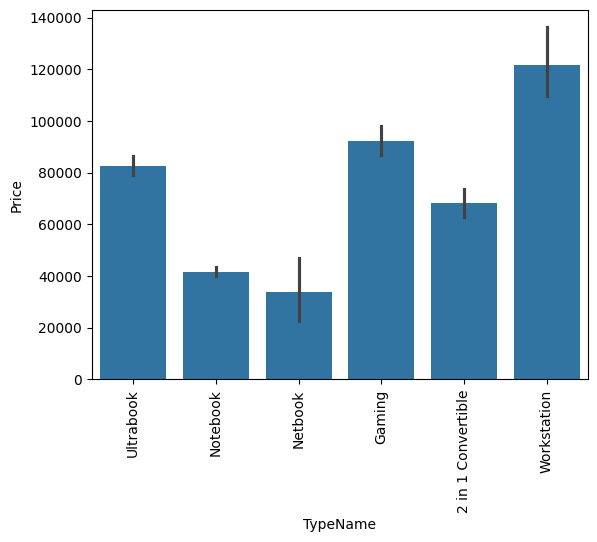

In [29]:
sns.barplot(x=laptop["TypeName"],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

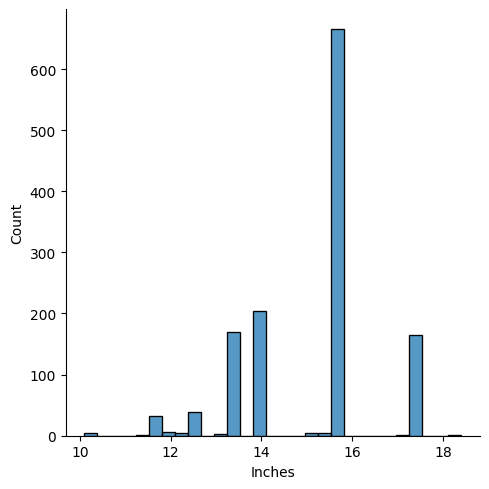

In [30]:
sns.displot(laptop["Inches"])

In [31]:
laptop["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [35]:
laptop['ScreenResolution'].str.split(" ")

0                [IPS, Panel, Retina, Display, 2560x1600]
1                                              [1440x900]
2                                   [Full, HD, 1920x1080]
3                [IPS, Panel, Retina, Display, 2880x1800]
4                [IPS, Panel, Retina, Display, 2560x1600]
                              ...                        
1298    [IPS, Panel, Full, HD, /, Touchscreen, 1920x1080]
1299    [IPS, Panel, Quad, HD+, /, Touchscreen, 3200x1...
1300                                           [1366x768]
1301                                           [1366x768]
1302                                           [1366x768]
Name: ScreenResolution, Length: 1303, dtype: object

In [38]:
laptop["Touchscreen"]=laptop["ScreenResolution"].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [40]:
laptop.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1220,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.30,81465,0
1221,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.20,78647,0
1073,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.49,58075,0
282,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.50,44169,0
459,HP,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.50,34093,0


<Axes: xlabel='Touchscreen'>

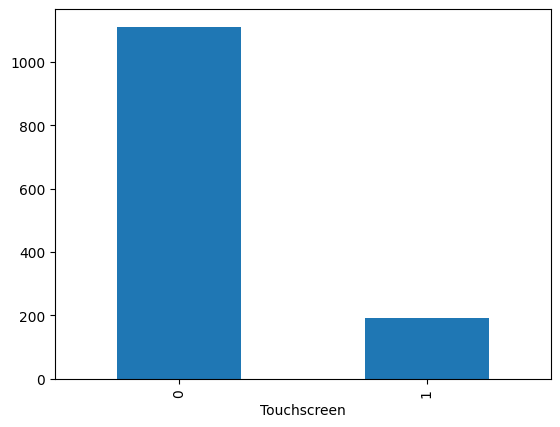

In [41]:
laptop['Touchscreen'].value_counts().plot(kind="bar")

<Axes: xlabel='Touchscreen', ylabel='Price'>

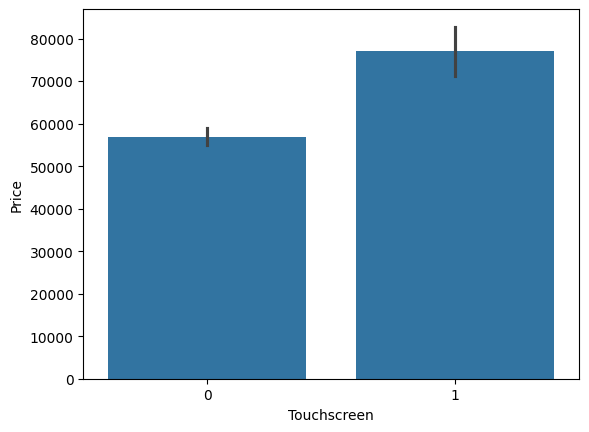

In [43]:
sns.barplot(x=laptop["Touchscreen"],y=laptop["Price"])

In [45]:
laptop["IPS"]=laptop["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)
laptop.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
915,Lenovo,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.44,46939,0,0
94,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.25,55890,0,0
788,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.20,122490,0,1
412,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon 520,Windows 10,2.10,24988,0,0
737,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,1.55,35111,1,0


In [46]:
laptop["IPS"].value_counts()

IPS
0    938
1    365
Name: count, dtype: int64

<Axes: xlabel='IPS', ylabel='Price'>

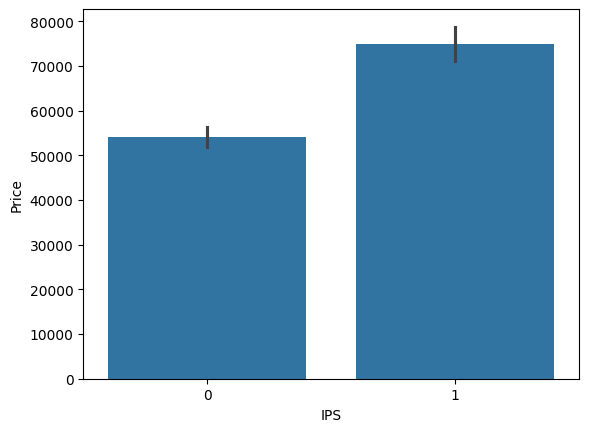

In [47]:
sns.barplot(x=laptop['IPS'],y=laptop["Price"])

In [70]:
new=laptop["ScreenResolution"].str.split('x',n=1,expand=True)
laptop['X_res']=new[0]
laptop['Y_res']=new[1]

In [71]:
laptop.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
777,Acer,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.80,33886,0,1,IPS Panel Full HD 1920,1080
206,Dell,Notebook,15.6,Touchscreen 1366x768,Intel Core i3 7100U 2.4GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,23389,1,0,Touchscreen 1366,768
1011,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.26,81997,0,0,Full HD 1920,1080
519,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX1050 Ti,Windows 10,3.00,80133,0,0,Full HD 1920,1080
1015,Toshiba,Notebook,13.3,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.50,64468,0,0,1366,768


In [72]:
laptop['X_res'] = laptop['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [73]:
laptop.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
774,HP,Ultrabook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,1.26,66280,0,0,1366,768
962,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,53759,0,0,1920,1080
770,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,AMD Radeon R7 M445,Windows 10,2.30,62938,0,0,1920,1080
666,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.06,50882,0,0,1920,1080
1039,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.64,53839,0,0,1920,1080


In [74]:
laptop['X_res']=laptop['X_res'].astype(int)
laptop['Y_res']=laptop['Y_res'].astype(int)

In [83]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   Int8   
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: Int8(1), float64(3), int32(2), int64(2), object(7)
memory usage: 135.0+ KB


In [86]:
laptop.select_dtypes(include='number').corr()['Price']

Inches         0.068196
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252207
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [87]:
laptop['ppi']=((laptop['X_res']**2 + laptop['Y_res']**2)**0.5)/laptop['Inches']

In [ ]:
laptop.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [94]:
laptop.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
620,HP,Notebook,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.31,59886.0,0,0,111.935204
1139,HP,Ultrabook,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.88,115709.0,0,0,141.211998
513,Dell,Notebook,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.20,64961.0,0,0,141.211998
894,MSI,Gaming,Intel Core i7 6700HQ 2.6GHz,16,512GB SSD + 2TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43,141138.0,0,1,254.671349
1175,Asus,Notebook,Intel Core i3 7100U 2.4GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,40972.0,0,0,157.350512


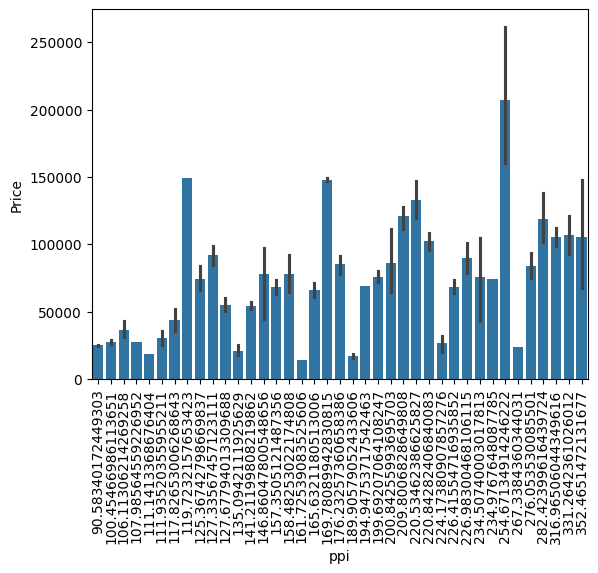

In [96]:
sns.barplot(x=laptop['ppi'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [97]:
laptop['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [98]:
laptop['CPU name']=laptop['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))


In [101]:
laptop.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU name
334,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.50,53226.0,0,0,141.211998,Intel Core i7
1002,Dell,Notebook,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,2.18,29144.0,0,0,100.454670,Intel Core i3
797,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.95,43156.0,0,0,100.454670,Intel Core i5
643,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050 Ti,No OS,2.50,62284.0,0,1,141.211998,Intel Core i7
1158,Lenovo,Notebook,Intel Core i5 6200U 2.3GHz,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 10,2.50,42010.0,0,0,141.211998,Intel Core i5


In [102]:
laptop["CPU name"].value_counts()

CPU name
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1

In [105]:
def fetch_processor(text):
    if(text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3'):
        return text
    else:
        if(text.split()[0]=='Intel'):
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [106]:
laptop["CPU brand"]=laptop['CPU name'].apply(fetch_processor)

In [107]:
laptop.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU name,CPU brand
810,HP,Gaming,Intel Core i7 7700HQ 2.8GHz,12,1TB HDD,AMD Radeon RX 580,Windows 10,3.74,93186.0,0,1,127.335675,Intel Core i7,Intel Core i7
1205,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon R7 M445,Windows 10,2.36,47365.0,0,0,141.211998,Intel Core i5,Intel Core i5
1174,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 940MX,No OS,2.20,37775.0,0,0,141.211998,Intel Core i7,Intel Core i7
228,Asus,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD + 500GB HDD,Nvidia GeForce GTX 950M,Windows 10,2.69,47472.0,0,0,127.335675,Intel Core i5,Intel Core i5
177,MSI,Gaming,Intel Core i7 6920HQ 2.9GHz,32,512GB SSD + 1TB HDD,Nvidia GTX 980 SLI,Windows 10,4.40,149130.0,0,0,119.723216,Intel Core i7,Intel Core i7


<Axes: xlabel='CPU brand'>

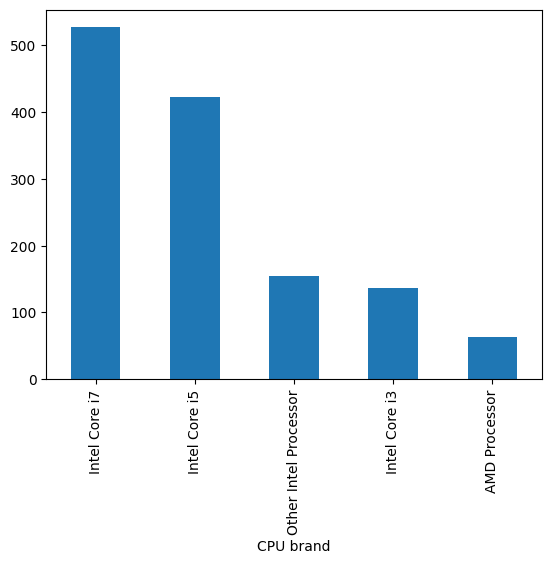

In [109]:
laptop['CPU brand'].value_counts().plot(kind='bar')

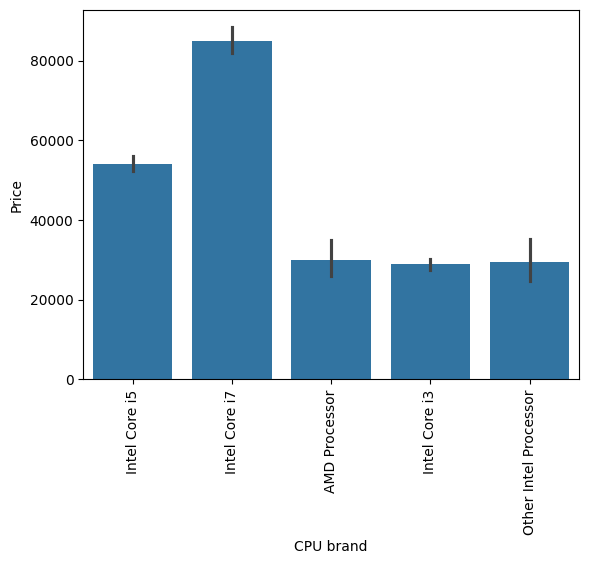

In [111]:
sns.barplot(x=laptop['CPU brand'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [113]:
laptop.drop(columns=['Cpu','CPU name'],inplace=True)

In [114]:
laptop.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU brand
359,Dell,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,76030.0,0,0,157.350512,Intel Core i5
422,HP,Notebook,8,256GB SSD,Intel HD Graphics 630,Windows 10,2.31,76030.0,0,0,141.211998,Intel Core i7
217,HP,Notebook,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.63,54931.0,0,0,157.350512,Intel Core i7
378,Asus,Notebook,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,15238.0,0,0,111.935204,Other Intel Processor
783,Lenovo,Notebook,8,1TB HDD,Intel HD Graphics 405,No OS,2.20,17529.0,0,0,100.454670,Other Intel Processor
